In [1]:
import numpy as np
import pandas as pd
import sklearn
import os
pd.set_option('max_columns',100)

In [3]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_ready.pkl")
PICKLE_FEATURE_DIR = os.path.join("..", "processed_data", "feature_ready.pkl")
%cd "processed_data/"

C:\Users\Ali\processed_data


In [4]:
features = pd.read_pickle(PICKLE_FEATURE_DIR)
train = pd.read_pickle(PICKLE_TRAIN_DIR)
train

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,0,4,10.0,37.0,1.00000,0,0,0,0,1,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,1,3,5.0,2.0,6.00000,0,0,0,1,0,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,0,7,7.0,76.0,4.00000,0,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,0,6,3.0,68.0,8.00000,0,0,0,1,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,0,6,2.0,69.0,9.00000,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,T,0.000000,27.880000,27.880000,2,381.770000,15.000000,0,4,4.0,7.0,4.92464,0,0,0,1,0,0,0,0,0,1,0
16092,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.671279,F,1.228913,0.000000,0.000000,1,90.340000,6.000000,1,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,F,1.279895,39.840000,39.840000,1,20.380000,15.935000,1,4,1.0,46.0,10.00000,0,0,0,1,0,0,0,0,0,1,0
16094,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,F,0.000000,13.080000,13.080000,1,0.960000,11.000000,0,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0


In [5]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [6]:
train = pd.merge(train , features , on = 'id')
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,0,4,10.0,37.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,1,3,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,0,7,7.0,76.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,0,6,3.0,68.0,8.0,0,0,0,1,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,0,6,2.0,69.0,9.0,0,0,0,0,1,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000


## A. Some necessary cleaning

In [7]:
train.drop(columns = ['id'] , inplace = True)
train.dropna(inplace = True)
y = train.loc[:,'churn']
train.drop(columns = ['churn'] , inplace = True)
train

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,4,10.0,37.0,1.00000,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,3,5.0,2.0,6.00000,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871
2,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,7,7.0,76.0,4.00000,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000
3,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,6,3.0,68.0,8.00000,0,0,0,1,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000
4,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,6,2.0,69.0,9.00000,0,0,0,0,1,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,T,0.000000,27.880000,27.880000,2,381.770000,15.000000,4,4.0,7.0,4.92464,0,0,0,1,0,0,0,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000
16092,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.671279,F,1.228913,0.000000,0.000000,1,90.340000,6.000000,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235
16093,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,F,1.279895,39.840000,39.840000,1,20.380000,15.935000,4,1.0,46.0,10.00000,0,0,0,1,0,0,0,0,0,1,0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
16094,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,F,0.000000,13.080000,13.080000,1,0.960000,11.000000,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000


In [8]:
train['has_gas'].astype('category')
train['has_gas'].replace(to_replace = ['F' , 'T'] , value = [0,1] , inplace = True)
train.head(2)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,0,2.920541,20.984222,21.133748,1,217.987028,20.604131,4,10.0,37.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.440000,25.440000,2,678.990000,43.648000,3,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871


In [9]:
X = train.copy(deep = True)

In [10]:
X['has_gas'] = X['has_gas'].astype('int32')
X['nb_prod_act'] = X['nb_prod_act'].astype('int32')
X.dtypes

cons_12m                    float64
cons_gas_12m                float64
cons_last_month             float64
forecast_cons_12m           float64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                       int32
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int32
net_margin                  float64
pow_max                     float64
tenure                        int32
months_to_end               float64
months_modif_prod           float64
months_renewal              float64
channel_epu                   uint8
channel_ewp                   uint8
channel_fix                   uint8
channel_foo                   uint8
channel_lmk                   uint8
channel_sdd                   uint8
channel_usi                   uint8
origin_kam                  

In [11]:

df = pd.DataFrame({'Dtype' : X.dtypes})
df['mask']  = df['Dtype'].isin(['int32' , 'uint8'])
df

,Dtype,mask
cons_12m,float64,False
cons_gas_12m,float64,False
cons_last_month,float64,False
forecast_cons_12m,float64,False
forecast_discount_energy,float64,False
forecast_meter_rent_12m,float64,False
forecast_price_energy_p1,float64,False
forecast_price_energy_p2,float64,False
forecast_price_pow_p1,float64,False
has_gas,int32,False


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)
(14397, 40)
(1600, 40)
(14397,)
(1600,)


In [13]:
n_features  = X.shape[1]
n_features

40

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras.activations import sigmoid

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.optimizers import SGD


In [16]:
af = tf.keras.layers.LeakyReLU(alpha=0.01)


In [48]:
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))

model.add(Dense(1, activation=sigmoid))

In [71]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))

In [72]:
# fit the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
450/450 - 1s - loss: 0.3056 - binary_accuracy: 0.9014
Epoch 2/30
450/450 - 0s - loss: 0.3047 - binary_accuracy: 0.9016
Epoch 3/30
450/450 - 0s - loss: 0.3029 - binary_accuracy: 0.9013
Epoch 4/30
450/450 - 0s - loss: 0.3037 - binary_accuracy: 0.9016
Epoch 5/30
450/450 - 0s - loss: 0.3035 - binary_accuracy: 0.9014
Epoch 6/30
450/450 - 0s - loss: 0.3034 - binary_accuracy: 0.9014
Epoch 7/30
450/450 - 1s - loss: 0.3031 - binary_accuracy: 0.9015
Epoch 8/30
450/450 - 0s - loss: 0.3021 - binary_accuracy: 0.9015
Epoch 9/30
450/450 - 1s - loss: 0.3029 - binary_accuracy: 0.9015
Epoch 10/30
450/450 - 0s - loss: 0.3044 - binary_accuracy: 0.9016
Epoch 11/30
450/450 - 0s - loss: 0.3037 - binary_accuracy: 0.9016
Epoch 12/30
450/450 - 1s - loss: 0.3030 - binary_accuracy: 0.9015
Epoch 13/30
450/450 - 0s - loss: 0.3029 - binary_accuracy: 0.9015
Epoch 14/30
450/450 - 1s - loss: 0.3030 - binary_accuracy: 0.9015
Epoch 15/30
450/450 - 1s - loss: 0.3033 - binary_accuracy: 0.9016
Epoch 16/30
450/450

In [73]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

50/50 - 0s - loss: 0.3081 - binary_accuracy: 0.9019
Test Accuracy: 90.19
loss is : 0.31


# Attributes

In [66]:
print(model.metrics_names)
print(model.layers)
print(model.distribute_strategy)
model.losses

['loss', 'accuracy']
[<tensorflow.python.keras.layers.core.Dense object at 0x000001E0D43C93A0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E0D43D9DF0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E0D43A1CA0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E0D439DBE0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E0D4385100>]


[]

# Methods

In [65]:
model.get_layer(
    name=None, index=0
)

# Weight Regularizers
1. kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
2. bias_regularizer: Regularizer to apply a penalty on the layer's bias
3. activity_regularizer: Regularizer to apply a penalty on the layer's output

# Batch_size Effect
1. Always use mini-batch or any number greater then 1

Train: 0.902, Test: 0.902


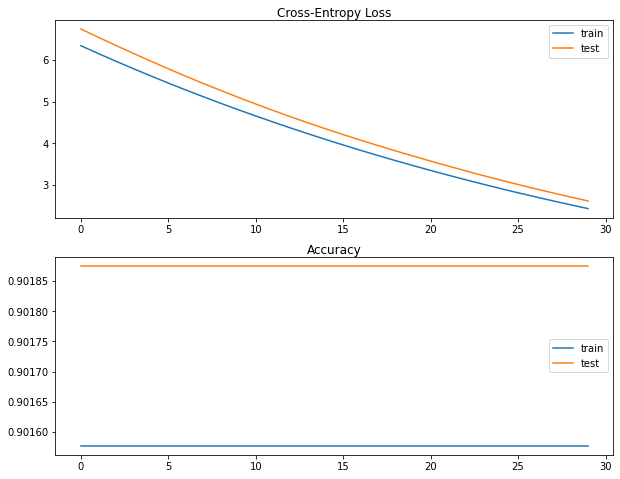

In [21]:
# Full batch_size 
from matplotlib import pyplot
pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))

model.add(Dense(1, activation=sigmoid))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=len(X_train), verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [22]:
# Batch_size = 1 (Interrupted too long to run)
pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))

model.add(Dense(1, activation=sigmoid))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

Train: 0.902, Test: 0.902


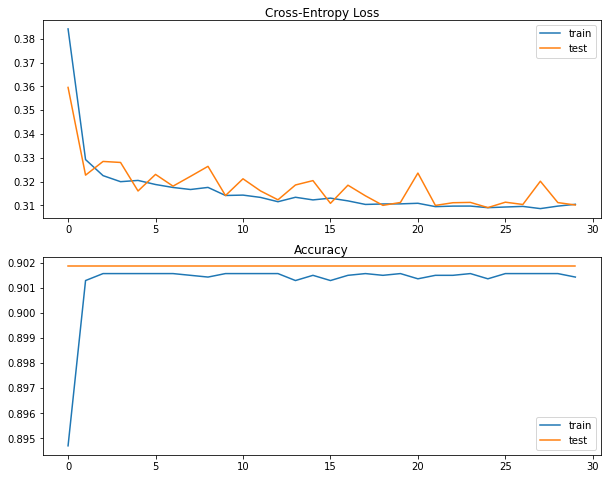

In [23]:
# batch_size = 32
pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))

model.add(Dense(1, activation=sigmoid))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# learning_rate 
1. The learning rate must also change by the epochs
2. First we applies simple SGD the accuracy was ([90.02 , 90.02]) then we applied SGD with varying L.R and the accuracy was ([90.02 , 90.02]).


Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Train: 0.902, Test: 0.902


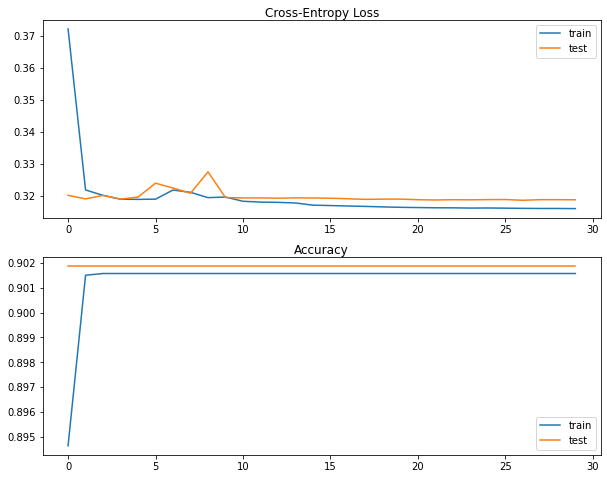

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))

model.add(Dense(1, activation=sigmoid))
opt = SGD(lr=0.01, momentum=0.9)

# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7,
verbose=1)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=0 , callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Batch_norm
Used to normalize the output from A.F and also reduces exploding gradient problem ( used mostly in case of un-normalized data )
1. Without batch_norm above we can see that accuracy is [90.02 , 90.02] and by using batch_norm the accuracy is [90.00 , 90.01]


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.
Train: 0.900, Test: 0.901


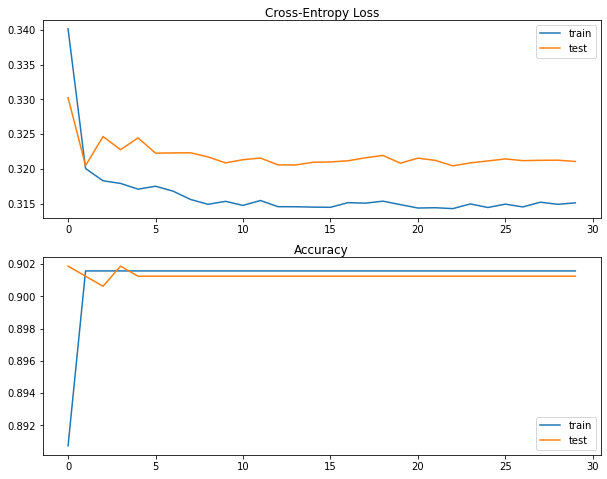

In [33]:
from tensorflow.keras.layers import BatchNormalization

pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(8, activation=af, kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(1, activation=sigmoid))
opt = SGD(lr=0.01, momentum=0.9)

# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7,
verbose=1)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=0 , callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Weight regularization
The learning algorithm can be updated to encourage the network toward using small weights. One way to do this is to change the calculation of loss used in the optimization of the network to also consider the size of the weights. This is called weight regularization or weight decay. 


Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.
Train: 0.902, Test: 0.902


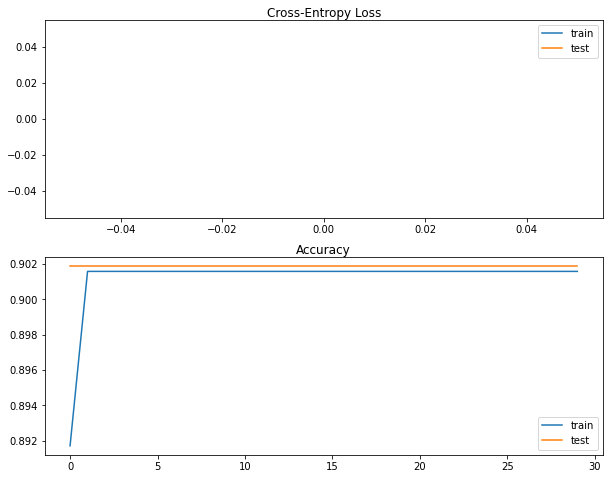

In [35]:
from tensorflow.keras.regularizers import l2

pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))

model.add(Dense(8, activation=af, kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))

model.add(Dense(1, activation=sigmoid))
opt = SGD(lr=0.01, momentum=0.9)

# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7,
verbose=1)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=0 , callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Adding noise
Training a neural network with a small dataset can cause the network to memorize all training examples, in turn leading to poor performance on a holdout dataset


Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.
Train: 0.902, Test: 0.902


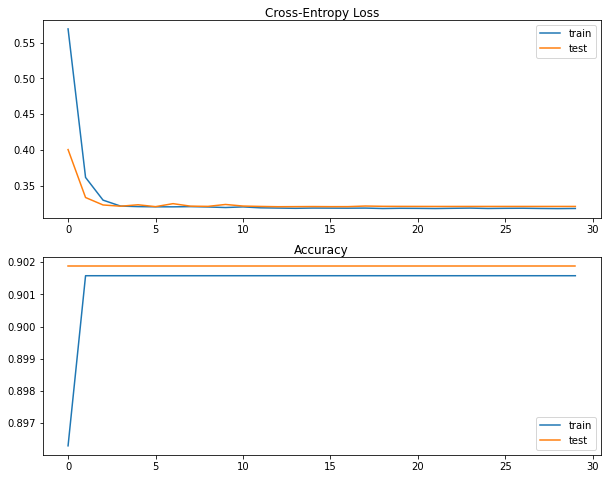

In [37]:
from tensorflow.keras.layers import GaussianNoise

pyplot.figure(figsize = (10,8))
model = Sequential()
model.add(Dense(10, activation=LeakyReLU(alpha = 0.01)
                , kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(GaussianNoise(0.1))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))
model.add(GaussianNoise(0.1))

model.add(Dense(8, activation=LeakyReLU(alpha = 0.01), kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))
model.add(GaussianNoise(0.1))

model.add(Dense(8, activation=af, kernel_initializer='he_normal' ,  kernel_regularizer=l2(0.01)))
model.add(GaussianNoise(0.1))

model.add(Dense(1, activation=sigmoid))
opt = SGD(lr=0.01, momentum=0.9)

# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7,
verbose=1)
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
))
# fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=0 , callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['binary_accuracy'], label='train')
pyplot.plot(history.history['val_binary_accuracy'], label='test')
pyplot.legend()
pyplot.show()